In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("train.csv")

df["Dates"] = pd.to_datetime(df["Dates"])

df["Hour"] = df["Dates"].dt.hour
df["Day"]  = df["Dates"].dt.dayofweek

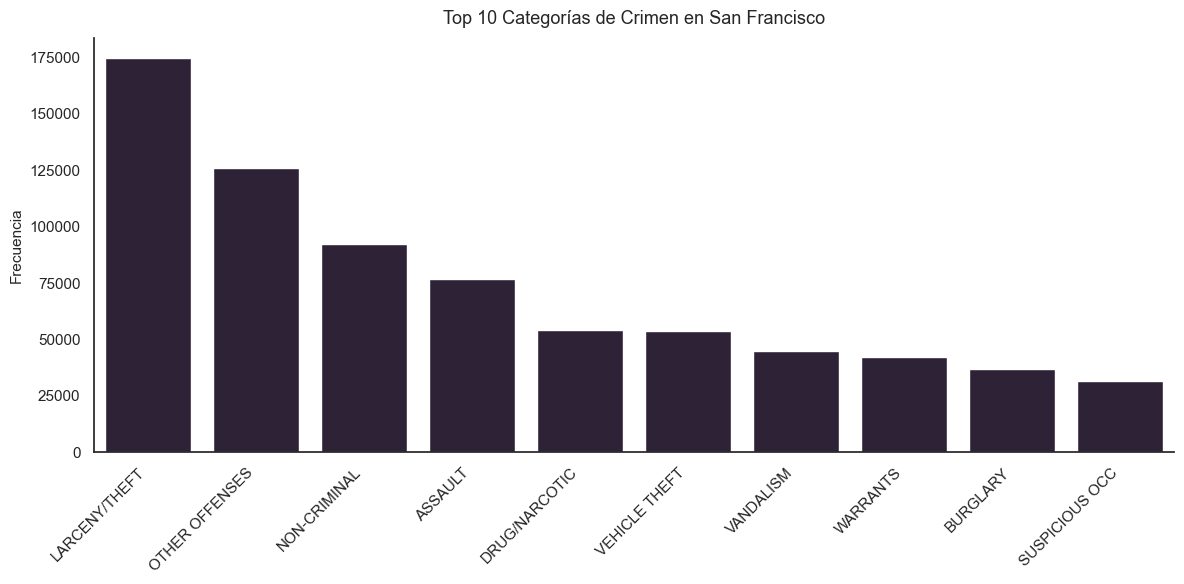

In [5]:
sns.set_style("white")        # quita grid
sns.set_palette("mako")       # paleta profesional

plt.figure(figsize=(12,6))

ax = sns.barplot(
    x=df["Category"].value_counts().head(10).index,
    y=df["Category"].value_counts().head(10).values
)

plt.title("Top 10 Categorías de Crimen en San Francisco", fontsize=13, pad=10)
plt.ylabel("Frecuencia", fontsize=11)
plt.xlabel("")

plt.xticks(rotation=45, ha="right")

# 
sns.despine()                 # quita bordes superiores y derechos

plt.tight_layout()
plt.savefig("fig1_distribucion_categorias.png", dpi=200, bbox_inches="tight")
plt.show()


/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_94946/4246090460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


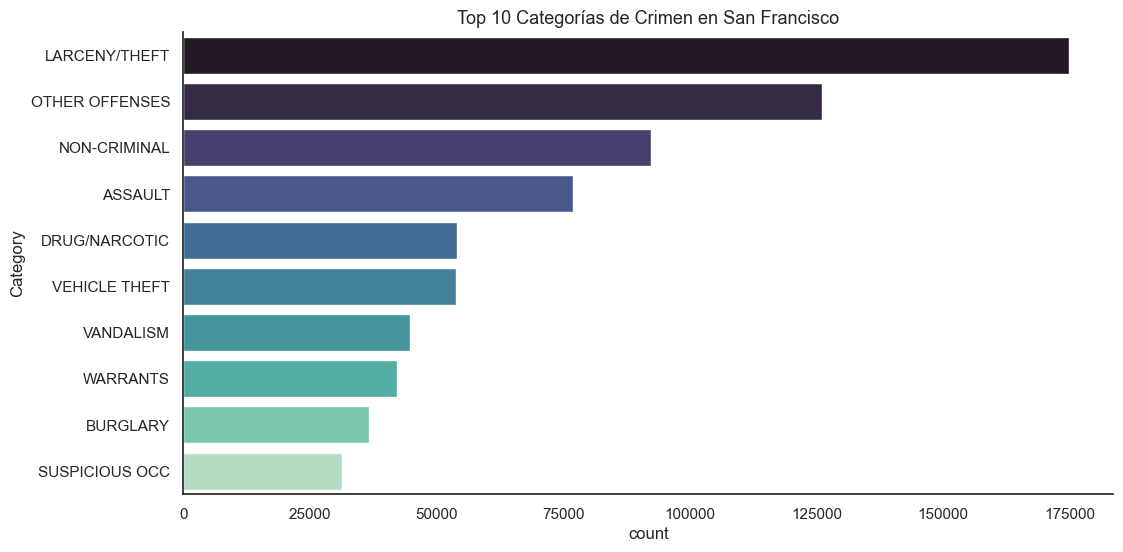

In [7]:
plt.figure(figsize=(12,6))

sns.countplot(
    data=df,
    y="Category",
    order=df["Category"].value_counts().head(10).index,
    palette="mako"
)

plt.title("Top 10 Categorías de Crimen en San Francisco", fontsize=13)
sns.despine()
plt.savefig("fig1.png", dpi=200, bbox_inches="tight")
plt.show()


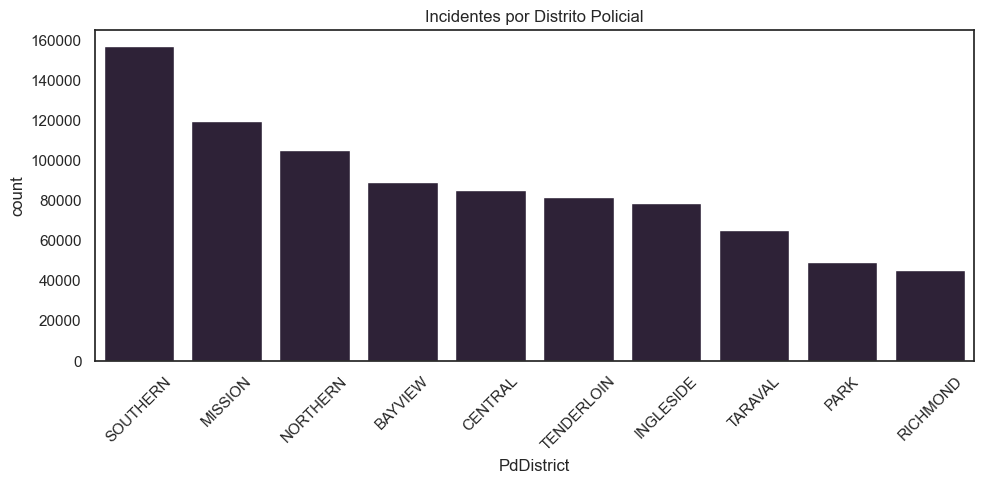

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="PdDistrict", order=df["PdDistrict"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Incidentes por Distrito Policial")
plt.tight_layout()
plt.savefig("fig2_por_distrito.png")
plt.show()


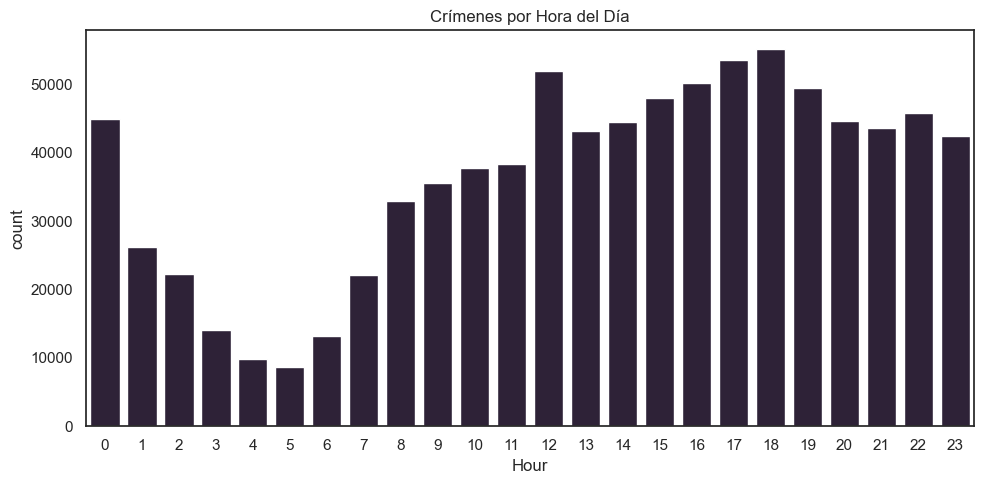

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Hour")
plt.title("Crímenes por Hora del Día")
plt.tight_layout()
plt.savefig("fig4_por_hora.png")
plt.show()


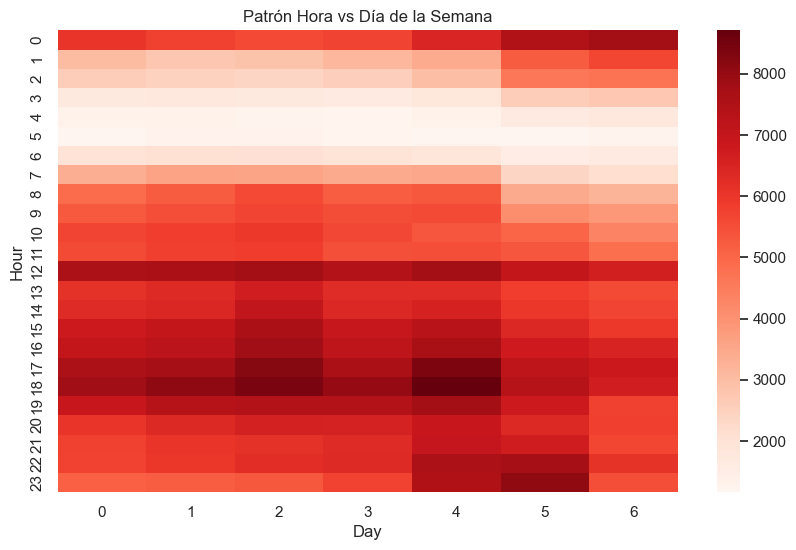

In [11]:
pivot = pd.crosstab(df["Hour"], df["Day"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="Reds")
plt.title("Patrón Hora vs Día de la Semana")
plt.savefig("fig5_heatmap_temporal.png")
plt.show()


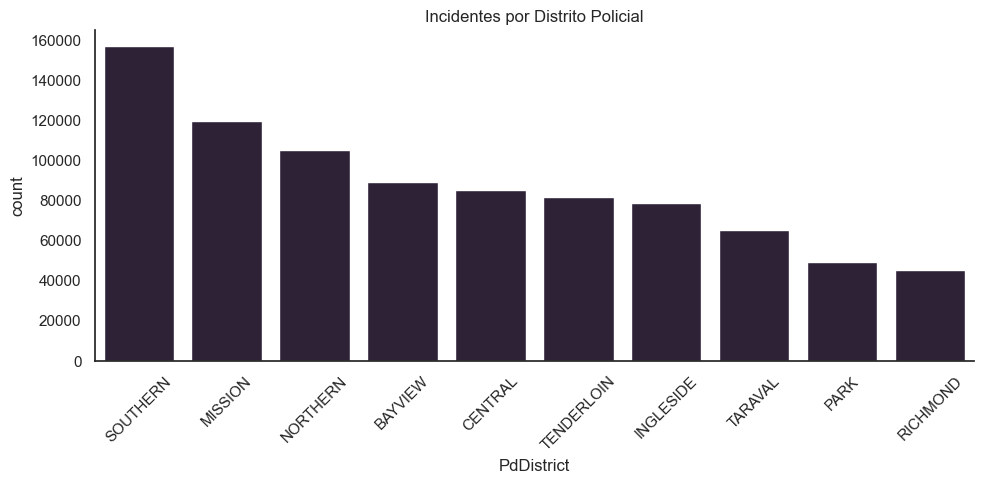

In [13]:
plt.figure(figsize=(10,5))

sns.set_style("white")  

sns.countplot(
    data=df,
    x="PdDistrict",
    order=df["PdDistrict"].value_counts().index
)

plt.xticks(rotation=45)
plt.title("Incidentes por Distrito Policial")

sns.despine()           

plt.tight_layout()
plt.savefig("fig2_por_distrito.png", dpi=200, bbox_inches="tight")
plt.show()


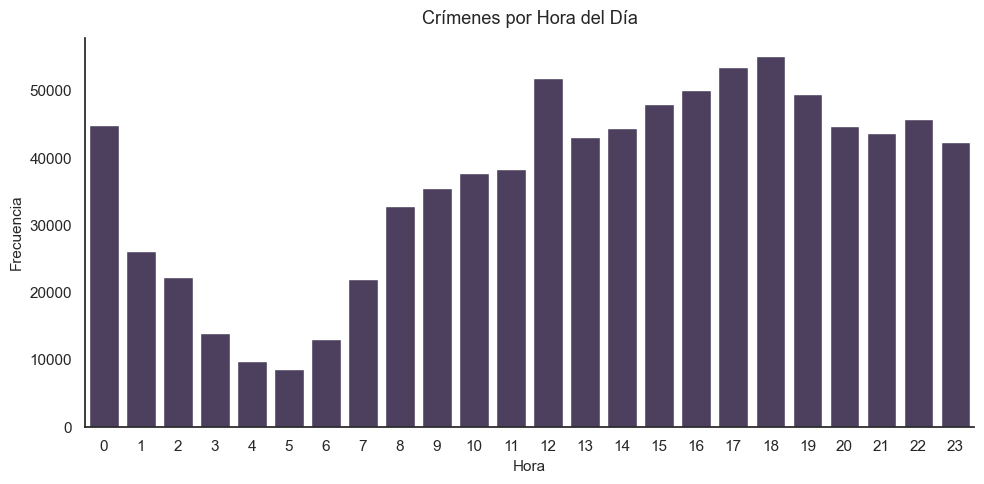

In [14]:
plt.figure(figsize=(10,5))

sns.set_style("white")      
sns.countplot(data=df, x="Hour", color="#4C3B63")   # tono consistente

plt.title("Crímenes por Hora del Día", fontsize=13, pad=10)
plt.xlabel("Hora", fontsize=11)
plt.ylabel("Frecuencia", fontsize=11)

sns.despine()               

plt.tight_layout()
plt.savefig("fig4_por_hora.png", dpi=200, bbox_inches="tight")
plt.show()


In [15]:
quality = pd.DataFrame({
    "Columna": df.columns,
    "No nulos": df.notnull().sum().values,
    "Nulos": df.isnull().sum().values,
    "% Completitud": (df.notnull().mean()*100).values
})

quality

,Columna,No nulos,Nulos,% Completitud
0,Dates,878049,0,100.0
1,Category,878049,0,100.0
2,Descript,878049,0,100.0
3,DayOfWeek,878049,0,100.0
4,PdDistrict,878049,0,100.0
5,Resolution,878049,0,100.0
6,Address,878049,0,100.0
7,X,878049,0,100.0
8,Y,878049,0,100.0
9,Hour,878049,0,100.0
